<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        Bank Marketing
    </h2>
    </div>

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   Input variables:
# bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
  # related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
   10 - day: last contact day of the month (numeric)
  
   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
   12 - duration: last contact duration, in seconds (numeric)
  
  # other attributes:
  
   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means    client was not previously contacted)
  
   15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

   Output variable (desired target):
  
   17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None

<a id="2"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Importing library</p>

In [1]:
# loading the Basic libraries

import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from warnings import filterwarnings
filterwarnings('ignore')

<a id="2"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Reading Data</p>

In [9]:
df = pd.read_csv(r"D:\document\Prodgy Internship\Third task\bank-full.csv",delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<a id="4"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Meta information of dataframe</p>

<a id="4.1"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Shape of DataFrame</p>

In [10]:
#shape of the dataset
df.shape

(45211, 17)

<a id="4.1"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Information of DataFrame</p>

In [12]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<a id="4.1"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Description of DataFrame</p>

In [14]:
#description of the numerical dataset 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<a id="4.1"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Duplicates of DataFrame</p>

In [16]:
#duplicates in the dataset
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


###### There is no duplicates in the dataset

In [20]:
#description of the object datatype
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


<a id="4"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Age</p>

In [37]:
#Distribution of age
distribution_count = df['age'].value_counts()
distribution_count

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

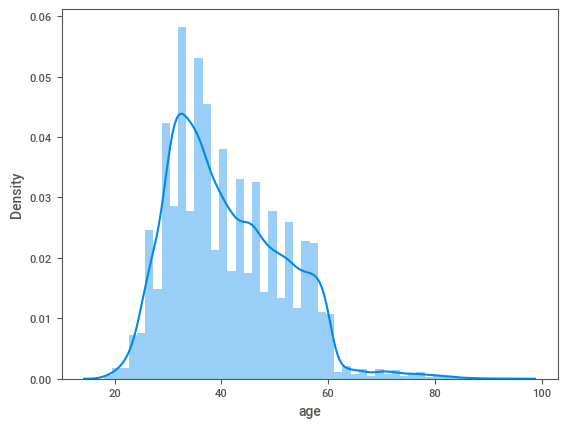

In [36]:
#plotting distribution of the age
sns.distplot(df['age'],kde=True)

<a id="4"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">JOB</p>

In [98]:
#job counts
distribution_job = df['job'].value_counts()
distribution_job

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

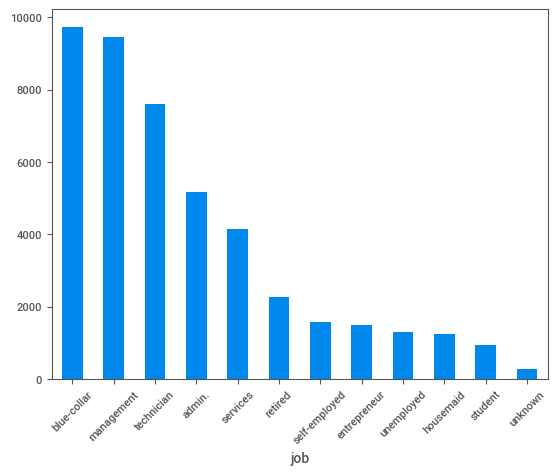

In [117]:
#plotting the barplot for job counts
distribution_job_ = df['job'].value_counts().plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

In [116]:
#calculating the percentage
distribution_job = df['job'].value_counts()  # Get job counts
dist_percent_job = (distribution_job / df['job'].count()) * 100  # Calculate percentage

# Display the percentages
print(dist_percent_job)

job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: count, dtype: float64


In [127]:
#Finding the balance vs job category
job_balance = df.groupby('job')['balance'].mean()
job_balance

job
admin.           1135.838909
blue-collar      1078.826654
entrepreneur     1521.470074
housemaid        1392.395161
management       1763.616832
retired          1984.215106
self-employed    1647.970868
services          997.088108
student          1388.060768
technician       1252.632092
unemployed       1521.745971
unknown          1772.357639
Name: balance, dtype: float64

In [112]:
#Job status according to the marital status
job_status_marital=df.groupby(['job'])['marital'].value_counts()
job_status_marital

job            marital 
admin.         married     2693
               single      1728
               divorced     750
blue-collar    married     6968
               single      2014
               divorced     750
entrepreneur   married     1070
               single       238
               divorced     179
housemaid      married      912
               divorced     184
               single       144
management     married     5400
               single      2947
               divorced    1111
retired        married     1731
               divorced     425
               single       108
self-employed  married      993
               single       446
               divorced     140
services       married     2407
               single      1198
               divorced     549
student        single       878
               married       54
               divorced       6
technician     married     4052
               single      2620
               divorced     925
unemployed     m

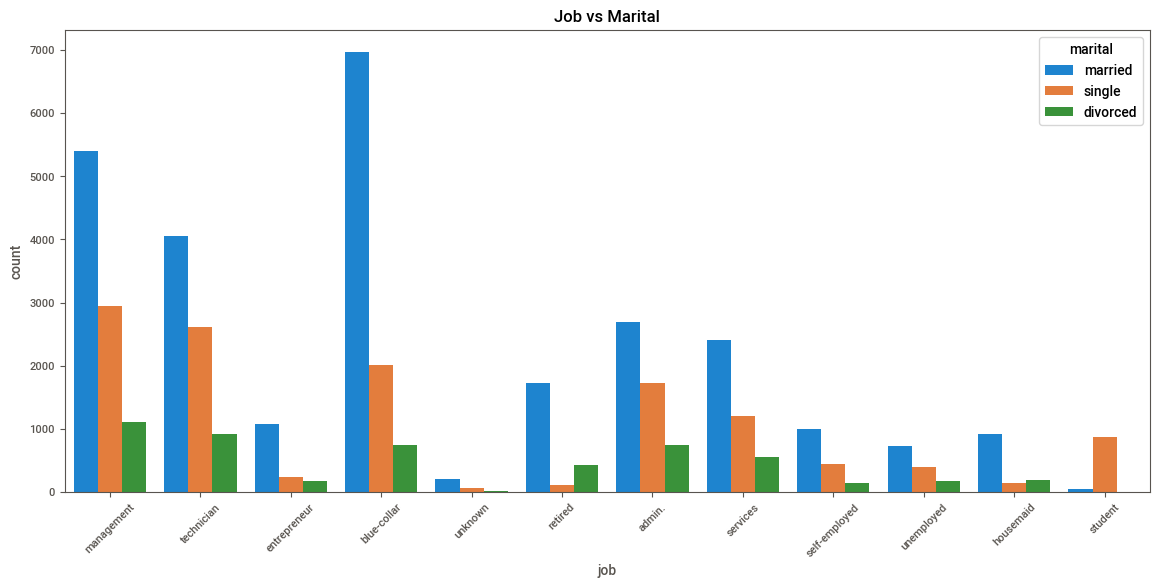

In [175]:
#plotting countplot for job vs marital
plt.figure(figsize=(14,6))
sns.countplot(x=df['job'],hue='marital',data = df)
plt.title('Job vs Marital')
plt.xticks(rotation = 45)
plt.show()

In [66]:
#job status according to the education qualification.
job_status_educn = df.groupby('job')['education'].value_counts()
job_status_educn

job            education
admin.         secondary    4219
               tertiary      572
               primary       209
               unknown       171
blue-collar    secondary    5371
               primary      3758
               unknown       454
               tertiary      149
entrepreneur   tertiary      686
               secondary     542
               primary       183
               unknown        76
housemaid      primary       627
               secondary     395
               tertiary      173
               unknown        45
management     tertiary     7801
               secondary    1121
               primary       294
               unknown       242
retired        secondary     984
               primary       795
               tertiary      366
               unknown       119
self-employed  tertiary      833
               secondary     577
               primary       130
               unknown        39
services       secondary    3457
               pri

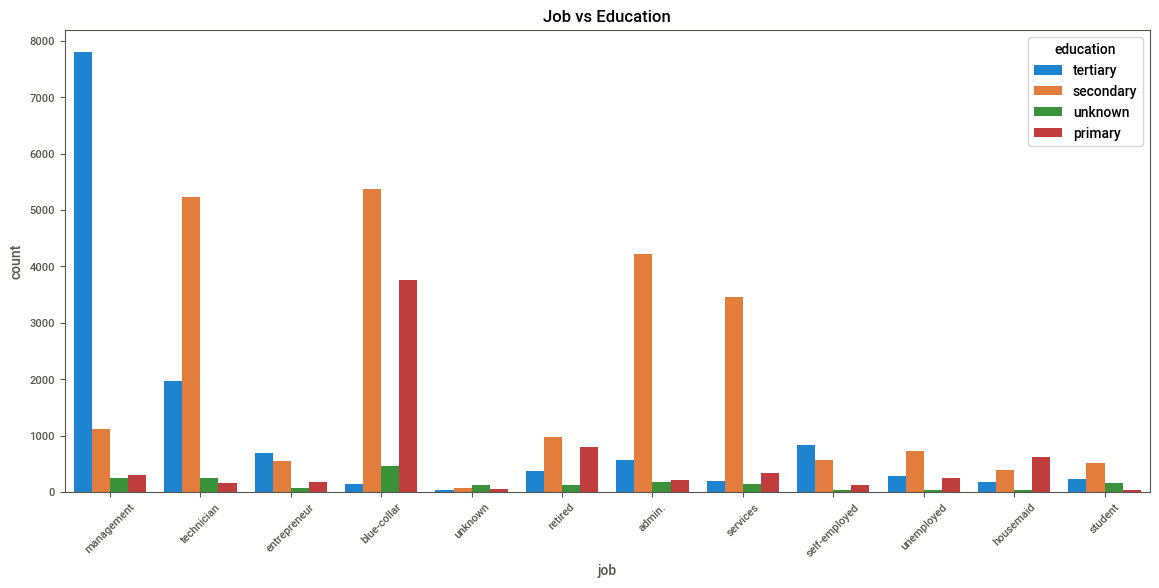

In [173]:
#plotting countplot for job vs education
plt.figure(figsize=(14,6))
sns.countplot(x=df['job'],hue='education',data = df)
plt.title('Job vs Education')
plt.xticks(rotation = 45)
plt.show()

In [67]:
#job description by default.
job_credit_default = df.groupby('job')['default'].value_counts()
job_credit_default

job            default
admin.         no         5097
               yes          74
blue-collar    no         9531
               yes         201
entrepreneur   no         1432
               yes          55
housemaid      no         1218
               yes          22
management     no         9294
               yes         164
retired        no         2238
               yes          26
self-employed  no         1546
               yes          33
services       no         4079
               yes          75
student        no          935
               yes           3
technician     no         7467
               yes         130
unemployed     no         1273
               yes          30
unknown        no          286
               yes           2
Name: count, dtype: int64

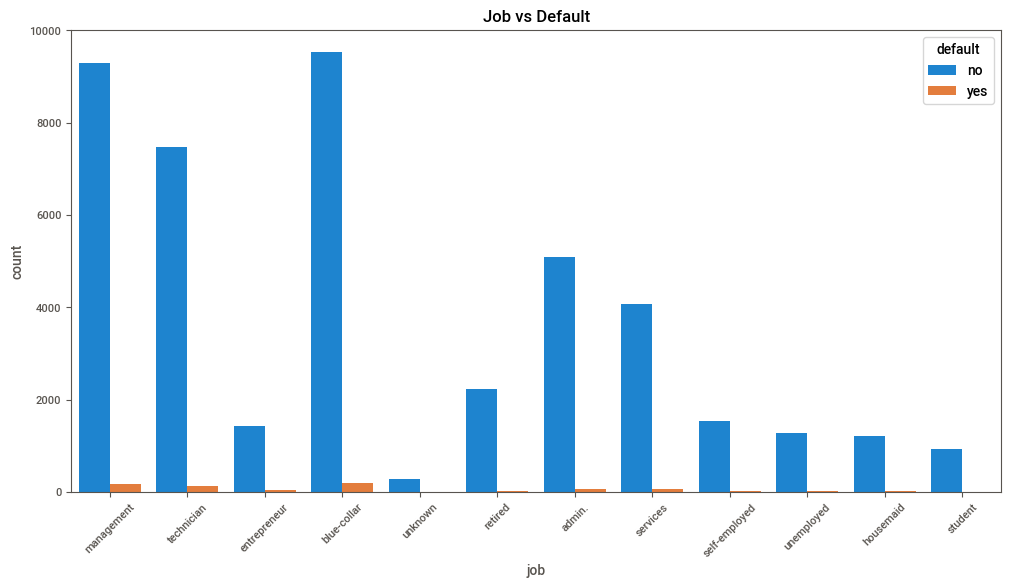

In [171]:
#plotting countplot for job vs default
plt.figure(figsize=(12,6))
sns.countplot(x=df['job'],hue='default',data = df)
plt.title('Job vs Default')
plt.xticks(rotation = 45)
plt.show()

In [71]:
#job counts by using the housing 
job_housing = df.groupby('job')['housing'].value_counts()
job_housing

job            housing
admin.         yes        3182
               no         1989
blue-collar    yes        7048
               no         2684
entrepreneur   yes         869
               no          618
housemaid      no          842
               yes         398
management     no         4780
               yes        4678
retired        no         1773
               yes         491
self-employed  no          814
               yes         765
services       yes        2766
               no         1388
student        no          689
               yes         249
technician     yes        4115
               no         3482
unemployed     no          760
               yes         543
unknown        no          262
               yes          26
Name: count, dtype: int64

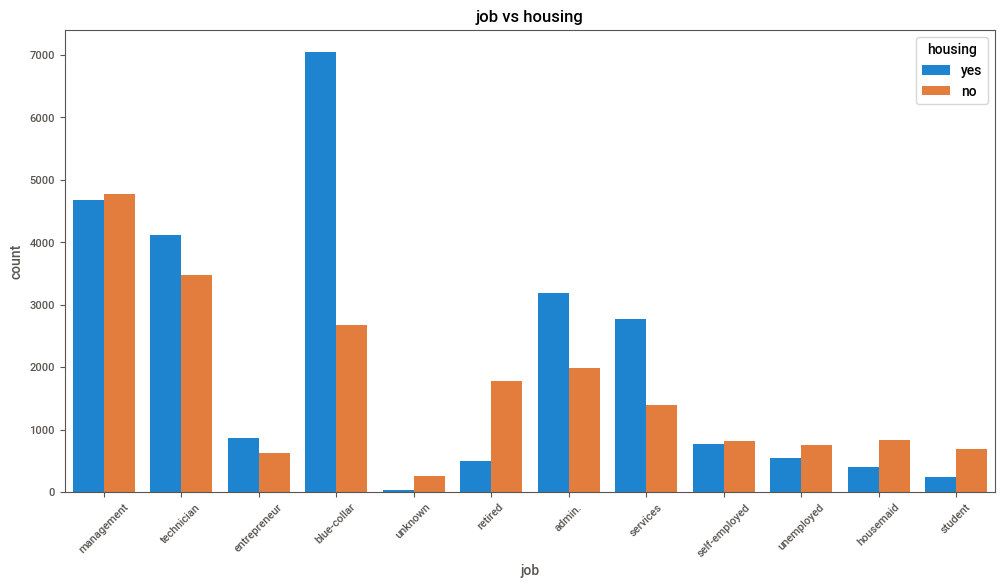

In [168]:
#plotting the graph for job vs housing
plt.figure(figsize=(12,6))
sns.countplot(x=df['job'],hue ='housing',data = df)
plt.title('job vs housing')
plt.xticks(rotation=45)
plt.show()

<a id="4"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Marital</p>

In [100]:
#marital status 
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

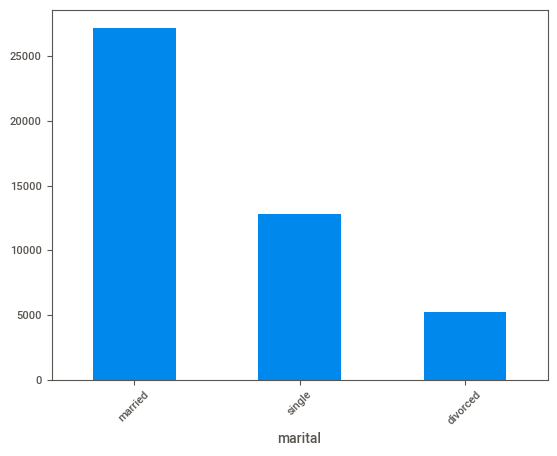

In [101]:
#plotting the marital status
df['marital'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [104]:
#categorising the marital status by target variable i.e y.
df.groupby('marital')['y'].value_counts()

marital   y  
divorced  no      4585
          yes      622
married   no     24459
          yes     2755
single    no     10878
          yes     1912
Name: count, dtype: int64

In [128]:
#average balance of marital status
mar_balance =df.groupby('marital')['balance'].mean()
mar_balance

marital
divorced    1178.872287
married     1425.925590
single      1301.497654
Name: balance, dtype: float64

<a id="4"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Education</p>

In [118]:
#finding the count of values for education.
education_count = df['education'].value_counts()
education_count

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

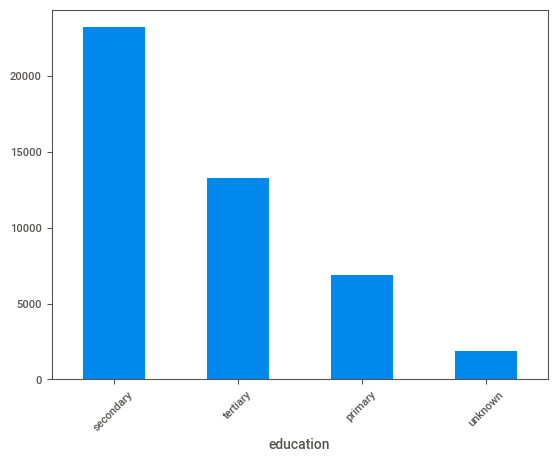

In [119]:
#plotting the education count using bar plot
education_count_vis = education_count.plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

In [120]:
#grouping the education by the target variable i.e y.
edu_y = df.groupby('education')['y'].value_counts()
edu_y

education  y  
primary    no      6260
           yes      591
secondary  no     20752
           yes     2450
tertiary   no     11305
           yes     1996
unknown    no      1605
           yes      252
Name: count, dtype: int64

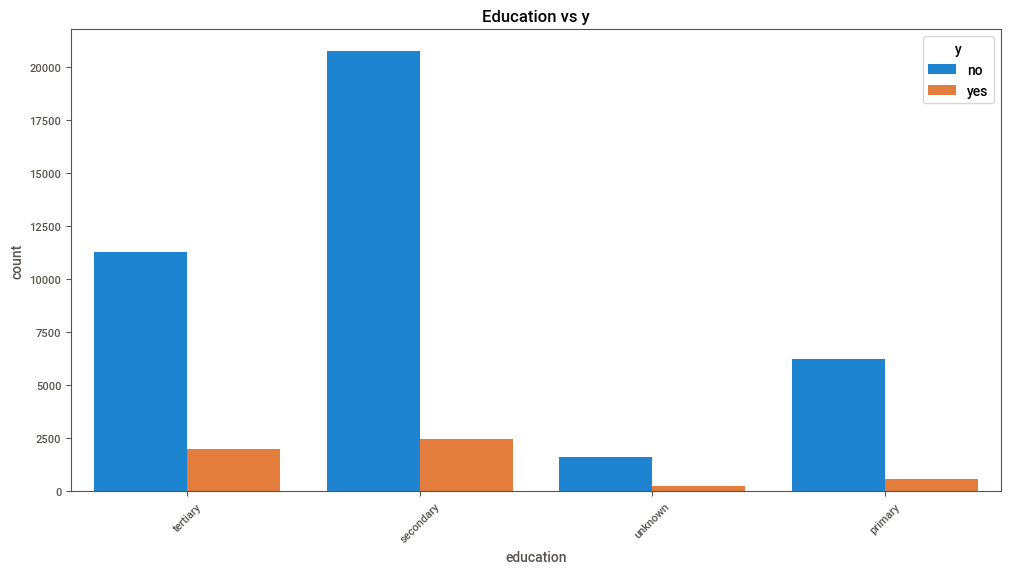

In [179]:
#plotting the graph for Education vs y
plt.figure(figsize=(12,6))
sns.countplot(x=df['education'],hue ='y',data = df)
plt.title('Education vs y')
plt.xticks(rotation=45)
plt.show()

In [124]:
#grouping the education by the default 
educ_def = df.groupby('education')['default'].value_counts()
educ_def

education  default
primary    no          6724
           yes          127
secondary  no         22744
           yes          458
tertiary   no         13103
           yes          198
unknown    no          1825
           yes           32
Name: count, dtype: int64

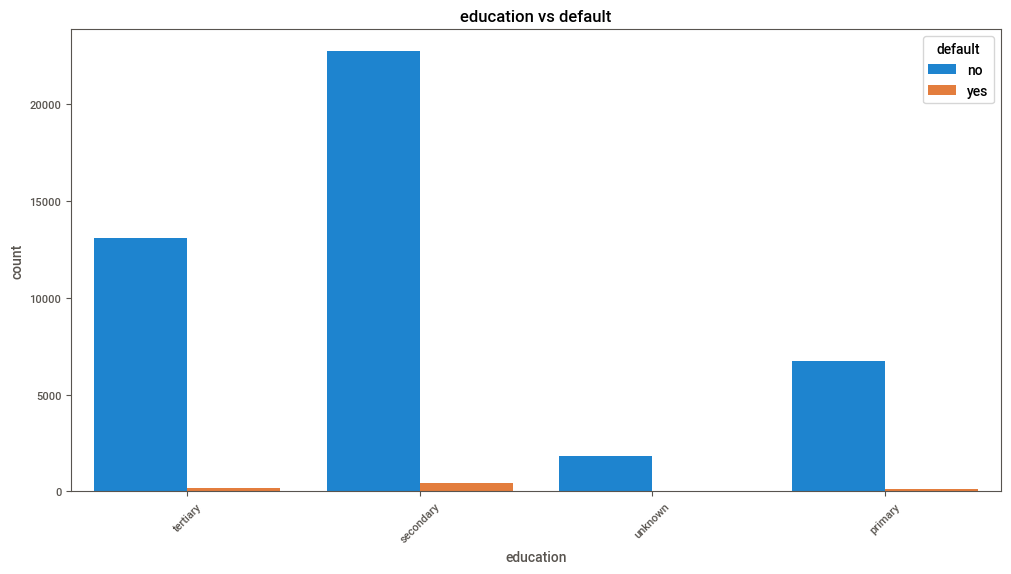

In [180]:
#plotting the graph for education vs default
plt.figure(figsize=(12,6))
sns.countplot(x=df['education'],hue ='default',data = df)
plt.title('education vs default')
plt.xticks(rotation=45)
plt.show()

In [126]:
#average balance of a different stage of educated
educ_bal = df.groupby('education')['balance'].mean()
educ_bal

education
primary      1250.949934
secondary    1154.880786
tertiary     1758.416435
unknown      1526.754443
Name: balance, dtype: float64

<a id="4"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Default</p>

In [130]:
#calculating the value counts in the default category
default_count = df.default.value_counts()
default_count

default
no     44396
yes      815
Name: count, dtype: int64

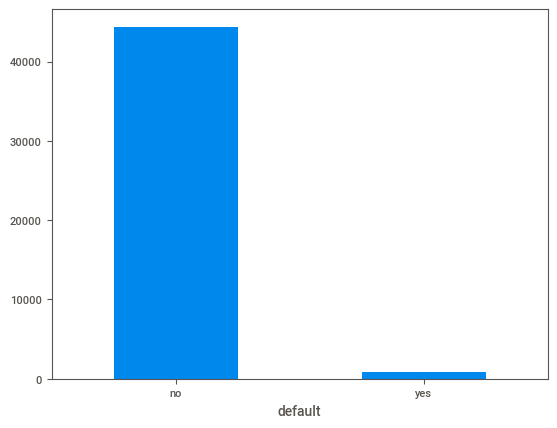

In [131]:
#plotting the default category by count
default_plo = default_count.plot(kind='bar')
plt.xticks(rotation = 0)
plt.show()

In [132]:
#grouping the default by balance.
def_bal = df.groupby('default')['balance'].mean()
def_bal

default
no     1389.806424
yes    -137.624540
Name: balance, dtype: float64

In [136]:
df.groupby('default')['housing'].value_counts()

default  housing
no       yes        24695
         no         19701
yes      yes          435
         no           380
Name: count, dtype: int64

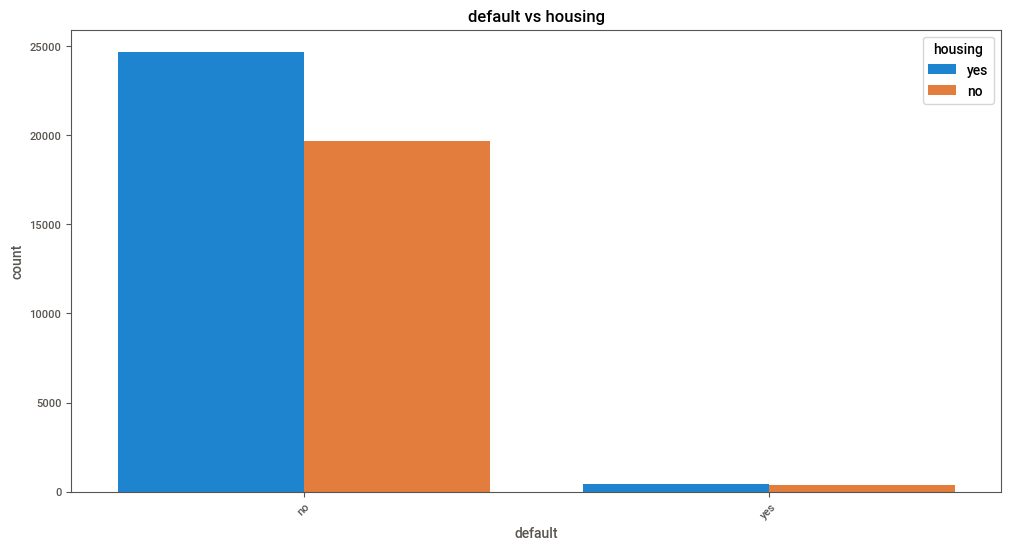

In [182]:
#plotting the graph for Default vs Housing
plt.figure(figsize=(12,6))
sns.countplot(x=df['default'],hue ='housing',data = df)
plt.title('default vs housing')
plt.xticks(rotation=45)
plt.show()

<a id="4"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Housing</p>

In [137]:
#counts of housing loan 
housing_count = df['housing'].value_counts()
housing_count

housing
yes    25130
no     20081
Name: count, dtype: int64

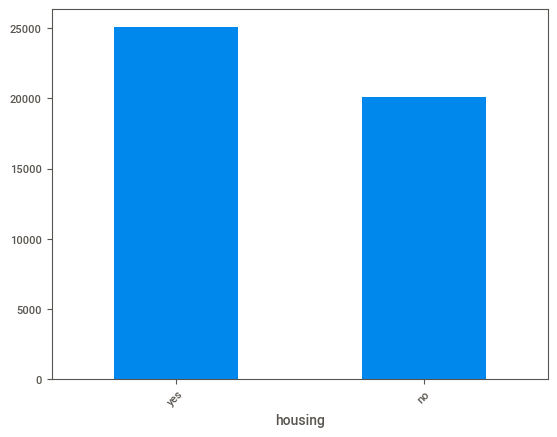

In [142]:
housing_count.plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

In [138]:
#categorising the housing loan with the job 
housing_job = df.groupby('housing')['job'].value_counts()
housing_job

housing  job          
no       management       4780
         technician       3482
         blue-collar      2684
         admin.           1989
         retired          1773
         services         1388
         housemaid         842
         self-employed     814
         unemployed        760
         student           689
         entrepreneur      618
         unknown           262
yes      blue-collar      7048
         management       4678
         technician       4115
         admin.           3182
         services         2766
         entrepreneur      869
         self-employed     765
         unemployed        543
         retired           491
         housemaid         398
         student           249
         unknown            26
Name: count, dtype: int64

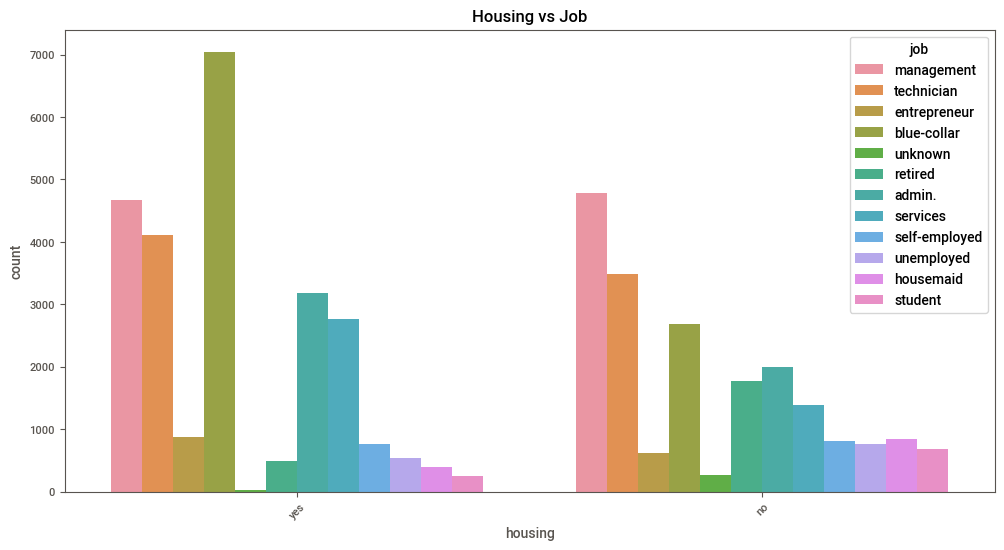

In [183]:
#plotting the graph for Housing vs Job
plt.figure(figsize=(12,6))
sns.countplot(x=df['housing'],hue ='job',data = df)
plt.title('Housing vs Job')
plt.xticks(rotation=45)
plt.show()

In [139]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no


In [141]:
#grouping the data of housing with y.
df.groupby('housing')['y'].value_counts()

housing  y  
no       no     16727
         yes     3354
yes      no     23195
         yes     1935
Name: count, dtype: int64

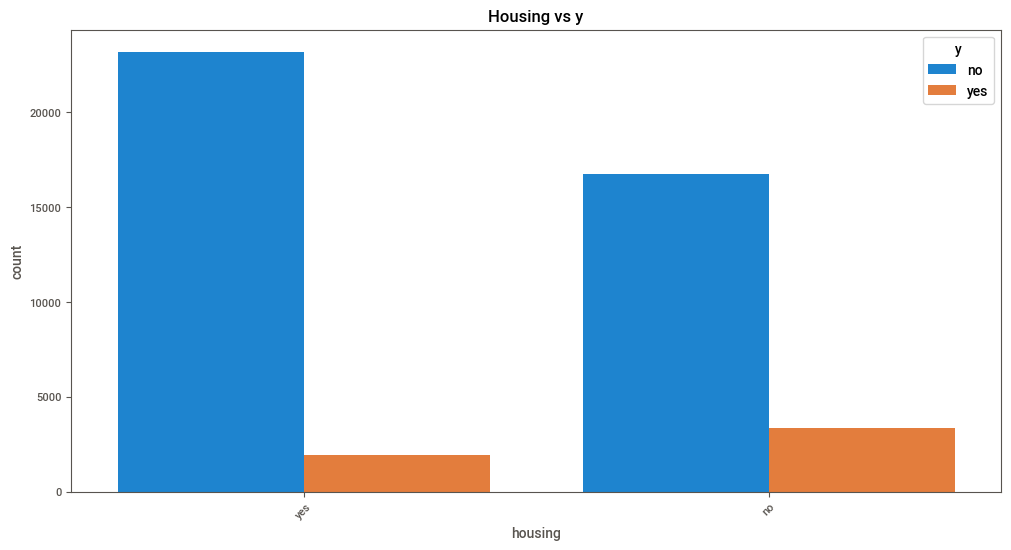

In [184]:
#plotting the graph for Housing vs y
plt.figure(figsize=(12,6))
sns.countplot(x=df['housing'],hue ='y',data = df)
plt.title('Housing vs y')
plt.xticks(rotation=45)
plt.show()

<a id="4"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Loan</p>

In [143]:
#count of people taken loan
loan_count = df['loan'].value_counts()
loan_count

loan
no     37967
yes     7244
Name: count, dtype: int64

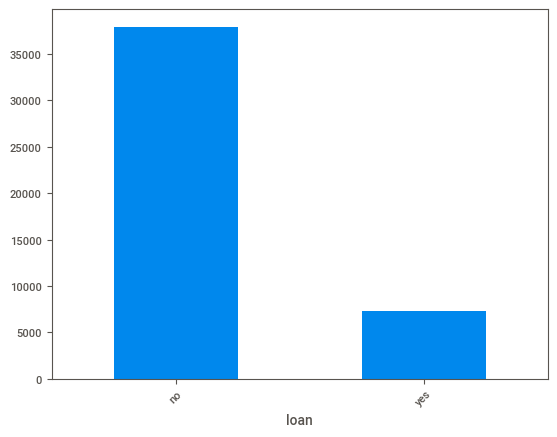

In [144]:
#plotting the count of people taken loan
loan_count.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [145]:
#people taking loan by education qualification
df.groupby('loan')['education'].value_counts()

loan  education
no    secondary    18899
      tertiary     11517
      primary       5827
      unknown       1724
yes   secondary     4303
      tertiary      1784
      primary       1024
      unknown        133
Name: count, dtype: int64

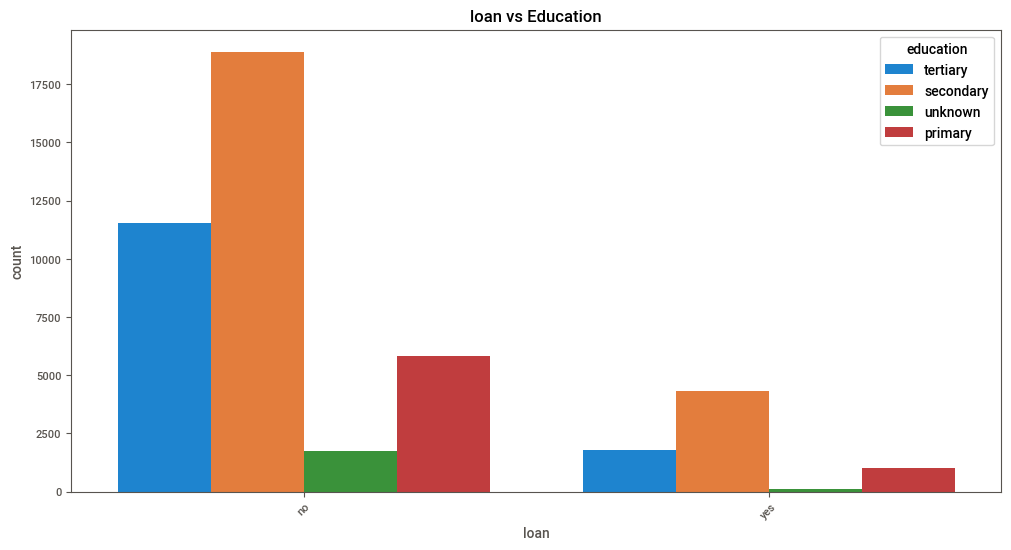

In [185]:
#plotting the graph for loan vs education
plt.figure(figsize=(12,6))
sns.countplot(x=df['loan'],hue ='education',data = df)
plt.title('loan vs Education')
plt.xticks(rotation=45)
plt.show()

In [266]:
#loan customer contacted
df.groupby('loan')['contact'].value_counts()

loan  contact
0.0   0.0        24485
      2.0        10988
      1.0         2494
1.0   0.0         4800
      2.0         2032
      1.0          412
Name: count, dtype: int64

<a id="4"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Contact</p>

In [147]:
#count of contact 
contact_count = df['contact'].value_counts()
contact_count

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

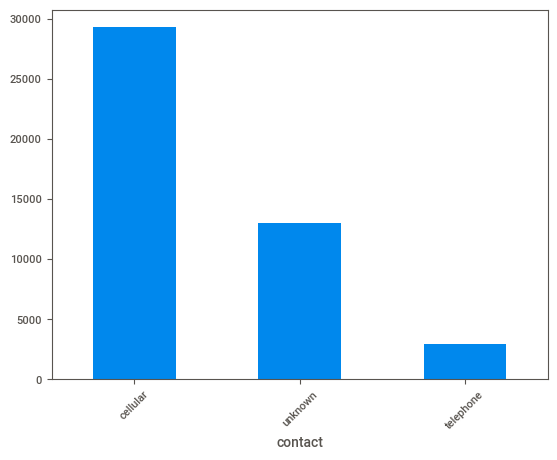

In [161]:
#plotting the contact count
contact_count.plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

In [152]:
#calculating the contact of the last day using different contact.
df.groupby('contact')['day'].mean()

contact
cellular     15.930306
telephone    16.557467
unknown      15.360138
Name: day, dtype: float64

In [153]:
#last customer contacted by different means in months 
df.groupby('contact')['month'].value_counts()

contact    month
cellular   aug      5950
           jul      5767
           may      5331
           nov      3540
           apr      2727
           feb      2362
           jan      1265
           jun       729
           oct       557
           sep       466
           mar       417
           dec       174
telephone  jul       852
           may       460
           nov       379
           feb       274
           aug       246
           apr       199
           oct       131
           jan       129
           jun        80
           sep        66
           mar        53
           dec        37
unknown    may      7975
           jun      4532
           jul       276
           aug        51
           nov        51
           oct        50
           sep        47
           feb        13
           jan         9
           mar         7
           apr         6
           dec         3
Name: count, dtype: int64

In [155]:
df.groupby('contact')['duration'].mean()

contact
cellular     263.013966
telephone    235.366139
unknown      252.340476
Name: duration, dtype: float64

In [159]:
df.groupby('contact')['pdays'].mean()

contact
cellular     56.885129
telephone    46.312801
unknown       1.299386
Name: pdays, dtype: float64

In [160]:
df.groupby('contact')['previous'].mean()

contact
cellular     0.804064
telephone    0.827254
unknown      0.021966
Name: previous, dtype: float64

In [191]:
num_col= df.describe(exclude='O')
num_col

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<a id="4.1"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Creating categorical column for ordinal encoding</p>

In [192]:
cat_col  =df.describe(include='O')
cat_col

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


<a id="4.1"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;"> ordinal encoding</p>

In [193]:
from sklearn.preprocessing import OrdinalEncoder
for column in cat_col:
    o_incoder = OrdinalEncoder()
    df[[column]] = o_incoder.fit_transform(df[[column]])
    

In [194]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0.0


<a id="4.1"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Splitting the data into X and Y for model</p>

In [201]:
X= df.drop(['y'],axis=1)
y=df['y']

In [202]:
X.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0


In [203]:
y.head(1)

0    0.0
Name: y, dtype: float64

<a id="4.1"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Splitting the data for model</p>

In [257]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 16), (9043, 16), (36168,), (9043,))

<a id="4.1"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Standardizing the data</p>

In [267]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale X_train
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)

# Scale X_test (use transform, not fit_transform)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


<a id="4"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Decision Tree algorithm</p>

In [268]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=9)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [269]:
y_pred_tree=tree.predict(X_test)

In [270]:
y_pred_train = tree.predict(X_train)      # ----- i am going to predict y_train
y_pred_test = tree.predict(X_test) 

In [271]:
from sklearn.metrics import r2_score

tree_train_score = r2_score(y_train,y_pred_train)
tree_test_score = r2_score(y_test,y_pred_test)

print(f'Training Accuracy = {train_score}\nTesting Accuracy = {test_score}')

Training Accuracy = 1.0
Testing Accuracy = 0.868843998820407


In [263]:
from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred_test))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

Mean Absolute Error = 0.10615946035607653
Mean Squared Error = 0.10615946035607653
Root Mean Squared Error = 0.3258212091869965


<a id="4"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Pruning the Tree</p>

In [264]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier with constraints
clf = DecisionTreeClassifier(
    max_depth=5,                # Limit tree depth
    min_samples_split=10,       # Minimum samples to split a node
    min_samples_leaf=5,         # Minimum samples at leaf node
    max_features='sqrt',        # Reduce features considered at each split
    random_state=42
)

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, clf.predict(X_test))

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.8921145764211458
Testing Accuracy: 0.8841092557779497


<a id="4"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Use Cross-Validation to Tune Hyperparameters</p>

In [265]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Grid Search with Cross Validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_clf = grid_search.best_estimator_
print("Training Accuracy:", accuracy_score(y_train, best_clf.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, best_clf.predict(X_test)))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Training Accuracy: 0.9272284892722849
Testing Accuracy: 0.8914077186774301


<a id="4"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Random Forest ensemble technique</p>

In [221]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth=9)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=9)

In [222]:
y_test_forest=forest.predict(X_test)
y_train_forest=forest.predict(X_train)

In [223]:
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

In [224]:
print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random Forest: Accuracy on training Data: 0.925
Random Forest: Accuracy on test Data: 0.901


In [226]:
from sklearn.metrics import mean_squared_error

In [227]:
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)


Random Forest: The RMSE of the training set is:  0.2741193236686478
Random Forest: The RMSE of the testing set is:  0.3147789945242363
